# HARSH PARIKH

## K-Means Clustering
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.

###### IMPORTING THE REQUIRED LIBRARIES AND DATASET
Numpy for mathematical calculations, pandas for dataset manipulation and matplotlib for data visualization. We also store the dataset into a dataframe using the read_csv method. Using the iloc method followed by the .values attribute we only keep the columns with the numerical data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values

###### Finding the optimum number of clusters for k-means classification
An effective way to find the optimum number of clusters is through the elbow method. In this method we start with 1 cluster and iteratively increase the number of clusters, in our case to 11, to see how the sum of squared distances of samples to their closest cluster center against the number of clusters looks like. As you can see, with the increase in number of clusters the WCSS decreases. Now, to determine what is the optimum number of clusters we select the first point on the X-axis after which the decrease in WCSS isn't very significant, that is, the curve flattens off. In our case, it's 3.

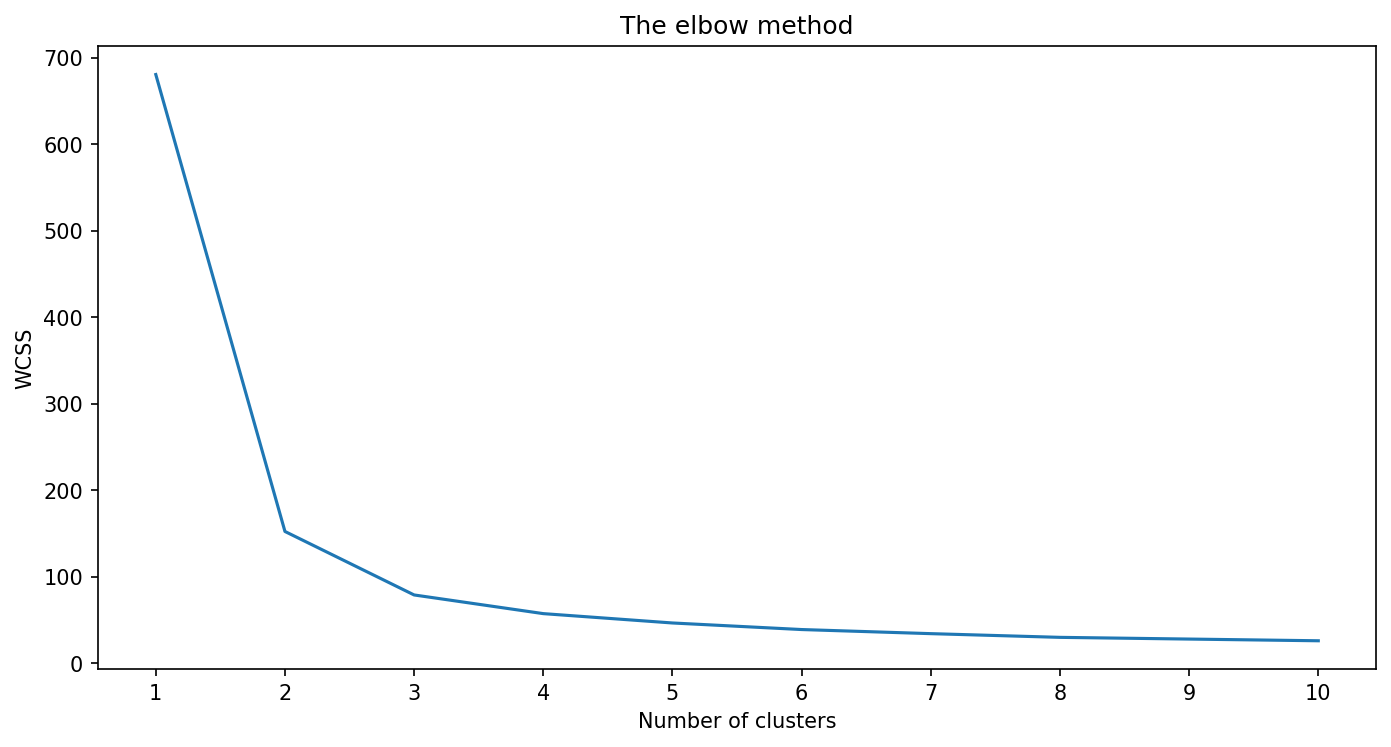

In [2]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(11,5.5),dpi=150)
plt.plot(range(1, 11), wcss)
plt.xticks(ticks=[i for i in range(1,11)])
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

###### Creating the kmeans classifier
We go ahead with the n_clusters parameter as 3 and thus our output will have 3 labels.

In [3]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

###### Visualising the clusters

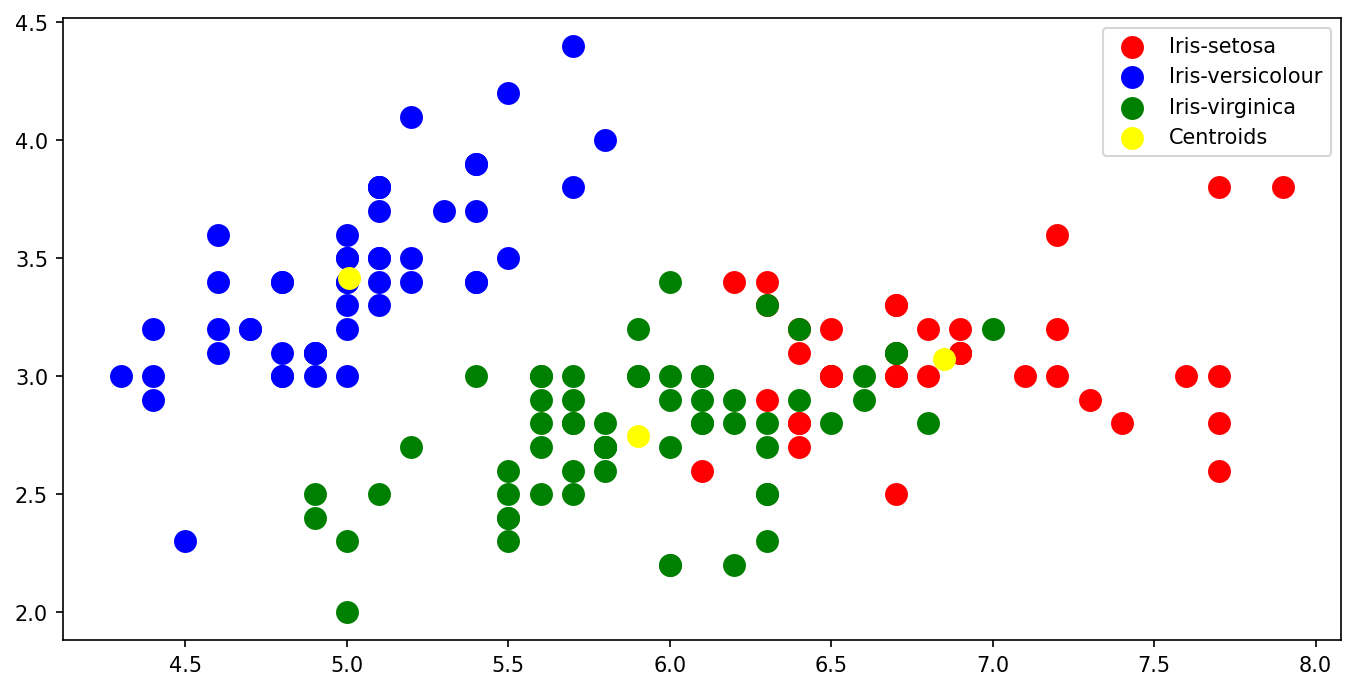

In [4]:
plt.style.use('seaborn-muted')
plt.figure(figsize=(11,5.5),dpi=150)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()